## 搜索算法

### 基础数据

In [130]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### 使用正则解析数据

In [2]:
import re

[a-z]  
[A-Z]  
[^a]: negation  
colou?r:  ? zero or one of its previous character  
\* : zero or more of its previous character  
+: one or more  
.:match any single character  
^:start of the line  
$:end of the line  
| [cat|dog] : cat or dog  
(da): make the string da like a character  


In [3]:
l = "color or colour"

In [4]:
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [6]:
pattern = re.compile("ou?r")
pattern.findall(l)

['or', 'or', 'our']

In [7]:
pattern = re.compile("[a-z]*ou?r")
pattern.findall(l)

['color', 'or', 'colour']

In [8]:
pattern = re.compile("[a-z]+ou?r")
pattern.findall(l)

['color', 'colour']

In [26]:
re.findall("name:'\w+'", "{name:'合肥', geoCoord:[117.27, 31.86]},")

["name:'合肥'"]

In [18]:
re.findall("name:'(\w+)'", "{name:'合肥', geoCoord:[117.27, 31.86]},")[0]

'合肥'

In [22]:
re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", "{name:'合肥', geoCoord:[117.27, 31.86]},")[0]

('117.27', '31.86')

In [23]:
re.findall("Coord:\[(\d+.\d+),\s\d+.\d+\]", "{name:'合肥', geoCoord:[117.27, 31.86]},")[0]

'117.27'

In [24]:
re.findall("Coord:\[(\d+).(\d+),\s(\d+).(\d+)\]", "{name:'合肥', geoCoord:[117.27, 31.86]},")[0]

('117', '27', '31', '86')

In [27]:
map(float, ('117', '27', '31', '86'))

In [28]:
tuple(map(float, ('117', '27', '31', '86')))

(117.0, 27.0, 31.0, 86.0)

In [29]:
def get_city_info(city_coordination):
    city_location = {}
    # 按换行符拆分成列表，遍历各行内容
    for line in city_coordination.split("\n"):
        # 跳过 // 开头的行和空行
        if line.startswith("//"):
            continue
        if not line.strip():
            continue
            
        # \w 匹配字符，+至少一个，()提取匹配的字符串
        city = re.findall("name:'(\w+)'", line)[0]
        # \d 匹配数字，\s 匹配空格
        # 多个()提取结果为逗号分隔的元组
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
        # map(function, tuple) 对tuple中每个值执行function
        # 即将x_y中元素转换为float
        # map返回的是map对象，转回tuple
        x_y = tuple(map(float, x_y))
        
        # 记录进字典中
        city_location[city] = x_y
    return city_location

In [30]:
city_info = get_city_info(coordination_source)

In [31]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### 计算城市间距离

In [39]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2)
        )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [40]:
def get_city_distance(city1, city2):
    return geo_distance(city_info[city1], city_info[city2])

In [41]:
get_city_distance("杭州","上海")

153.5185697155768

### 画图

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# 在页面内绘制图形
%matplotlib inline

# 设置字体，解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [34]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

E:\ProgramData\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


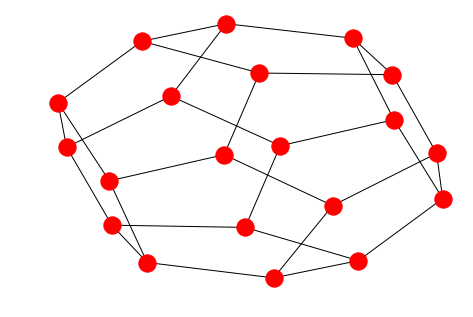

In [43]:
G = nx.dodecahedral_graph()
nx.draw(G)

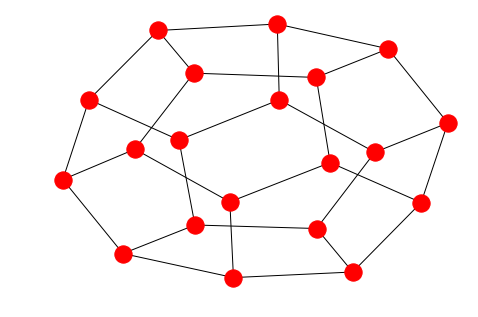

In [44]:
nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

In [35]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

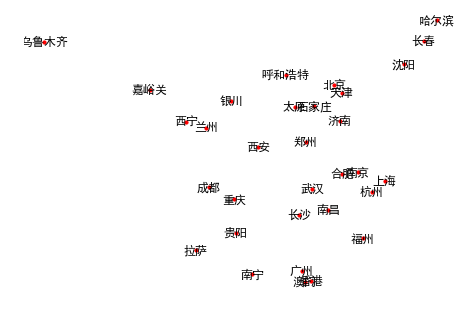

In [38]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

### 建立连边

In [46]:
# 连接阈值，两座城市距离小于阈值则增加一条连边
threshold = 700

In [47]:
# 带默认值工厂的字典，key不存在的时候会生成默认值并返回
from collections import defaultdict

In [53]:
def build_connection(city_info):
    # 建立字典，key不存在时返回空列表
    cities_connection = defaultdict(list)
    # 将城市名转为列表，两层遍历
    cities = list(city_info.keys())
    for i in range(len(cities)):
        for j in range(i+1, len(cities)):
            c1 = cities[i]
            c2 = cities[j]
            # 找到距离小于阈值的城市，添加两条连接记录
            if get_city_distance(c1, c2) < threshold:
                cities_connection[c1].append(c2)
                cities_connection[c2].append(c1)
    return cities_connection

In [51]:
cities_connection = build_connection(city_info)

In [52]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '西安': ['兰州',
              '成都',
              '石家庄',
              '贵阳',
              '武汉',
              '郑州',
              '广州',
              '长沙',
              '太原',
              '重庆',
              '呼和浩特',
              '南宁',
              '银川'],
             '重庆': ['兰州', '西宁', '成都', '拉萨', '贵阳', '西安', '呼和浩特', '南宁', '银川'],
             '南宁': ['兰州',
              '成都',
              '拉萨',
              '贵阳',
              '广州',
              '长沙',
              '西安',
              '重庆',
              '银川',
              '香港',
              '澳门'],
       

### 画出连接图

In [57]:
cities_connection_graph = nx.Graph(cities_connection)

E:\ProgramData\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


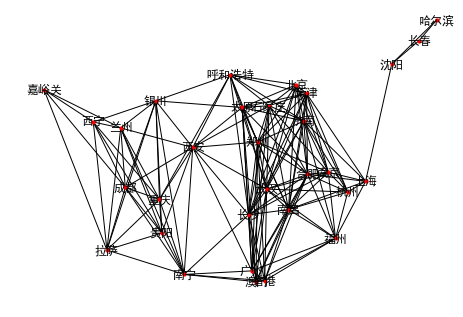

In [58]:
nx.draw(cities_connection_graph, city_info, with_labels=True, node_size=10)

### BFS 1 version

In [81]:
l = ["s"]

In [82]:
print(l+["a"])

['s', 'a']


In [83]:
print(l.append("a"))

None


In [59]:
def bfs_1(graph, start, destination):
    pathes = [[start]] # list 存储待搜索路径（相当于bfs中的队列queue）
    visited = set() # set 记录已搜索的节点
    
    while pathes:
        path = pathes.pop(0) # 取出第一条路径，相当于队首元素
        frontier = path[-1]  # 取出即将探索的节点
        
        # 如果该点已经探索过，则不用再探索，跳过
        if frontier in visited:
            continue
        # 取出该点的后继，即有连接关系的点
        successors = graph[frontier]
        # 遍历后继节点
        
        for city in successors:
            # 跳过已经在路径中的点，避免成环
            if city in path:
                continue
            # 这里不能直接用append，append会拼入原列表，并返回None；
            # 使用加号为列表拼接，会返回新列表
            new_path = path + [city]
            # 加入队列list尾部
            pathes.append(new_path) 
            # 如果已经找到终点，直接返回该路径
            if city == destination:
                return new_path
            
        # 将节点加入已访问记录
        visited.add(frontier)
        
    # 遍历结束，没有找到路径，返回空列表
    return []

In [61]:
bfs_1(cities_connection,"上海","香港")

['上海', '合肥', '香港']

### DFS

In [88]:
def dfs(graph, start, destination):
    pathes = [[start]] # list 存储待搜索路径（相当于dfs中的栈stack）
    visited = set()
    
    while pathes:
        path = pathes.pop() # 取出第一条路径，与bfs不同，取最后一条，相当于栈顶元素
        frontier = path[-1]
        
        if frontier in visited:
            continue
        successors = graph[frontier]
        
        for city in successors:
            if city in path:
                continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
            
        visited.add(frontier)

In [89]:
dfs(cities_connection,"上海","香港")

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

In [73]:
print("上海 ->",cities_connection["上海"][-1])
print("天津 ->",cities_connection["天津"][-1])
print("呼和浩特 ->",cities_connection["呼和浩特"][-1])
print("银川 ->",cities_connection["银川"][-1])
print("南宁 ->",cities_connection["南宁"])

上海 -> 天津
天津 -> 呼和浩特
呼和浩特 -> 银川
银川 -> 南宁
南宁 -> ['兰州', '成都', '拉萨', '贵阳', '广州', '长沙', '西安', '重庆', '银川', '香港', '澳门']


### Optimal searching using variation of BFS

In [102]:
# 按总距离给路径排序
def sort_by_distance(pathes):
    # 获取路径总距离
    def get_distance_of_path(path):
        distance = 0
        # 遍历前n-1个节点，省去了获取path[i + 1]时对数组下标越界的判断
        for i,_ in enumerate(path[:-1]):
            # 获取第 i 和 i + 1 个节点间的距离，加入总和
            distance += get_city_distance(path[i], path[i + 1])
        return distance
    # 调用排序，排序依据为路径总距离
    return sorted(pathes, key=get_distance_of_path)

In [91]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [114]:
get_distance_of_path(["北京","南京","上海"])

784.4063058191027

In [115]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [151]:
def bfs_2(graph, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited:
            continue
        # 判断是否已经找到终点，是则直接返回
#         if frontier == destination:
#             return path
        
        successors = graph[frontier]
        
        for city in successors:
            # check loop
            if city in path:
                continue
            new_path = path + [city]
            pathes.append(new_path)
        print("before=>",pathes)
        # 使用查找策略对路径进行排序
        pathes = search_strategy(pathes)
        print("-"*30)
        print("visited===",visited)
        print("after=>",pathes)
        print("="*30)
        visited.add(frontier)
        # 不能在这里判断是否找到终点的原因：
        # 代码通过判断pathes[0]的末尾是否为终点来确定是否返回，但是pathes[0]的末节点可能
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]  
    return []

In [147]:
def bfs_3(graph, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in visited:
            continue
        
        successors = graph[frontier]
        
        for city in successors:
            # check loop
            if city in path:
                continue
            new_path = path + [city]
            pathes.append(new_path)
        print("before=>",pathes)
        # 使用查找策略对路径进行排序
        pathes = search_strategy(pathes)
        print("-"*30)
        print("after=>",pathes)
        print("="*30)
        visited.add(frontier)
        # 不能在这里判断是否找到终点的原因：
        # 代码通过判断pathes[0]的末尾是否为终点来确定是否返回，但是pathes[0]的末节点可能
        # 判断是否已经找到终点，是则直接返回
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]  
    return []

In [152]:
bfs_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

before=> [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特']]
------------------------------
visited=== set()
after=> [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特']]
before=> [['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特'], ['北京', '石家庄', '武汉'], ['北京', '石家庄', '郑州'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '南京'], ['北京', '石家庄', '合肥'], ['北京', '石家庄', '南昌'], ['北京', '石家庄', '广州'], ['北京', '石家庄', '长沙'], ['北京', '石家庄', '太原'], ['北京', '石家庄', '西安'], ['北京', '石家庄', '天津'], ['北京', '石家庄', '呼和浩特']]
------------------------------
visited=== {'北京'}
after=> [['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], [

[]

In [144]:
# 不使用visited时，无限循环了…
bfs_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '南京', '上海']